___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower. ( Lenders use borrowers' FICO scores along with other details on borrowers' credit reports to assess credit risk and determine whether to extend credit.)
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: the output label column. not.fully.paid=0 means customer is paying to the fully

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [110]:
df = pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [111]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [112]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [113]:
df.info() 

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome. You can also use pandas built in .hist()**

In [114]:
loans = df

Text(0.5, 0, 'FICO')

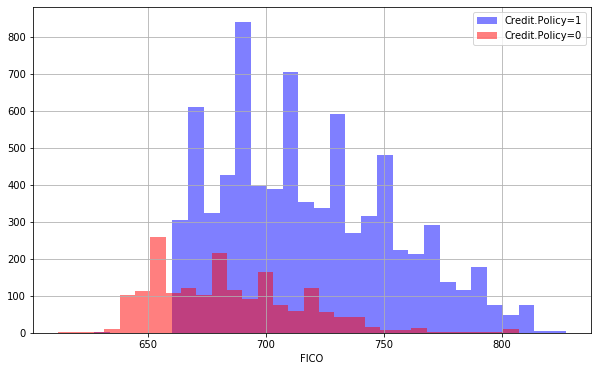

In [115]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

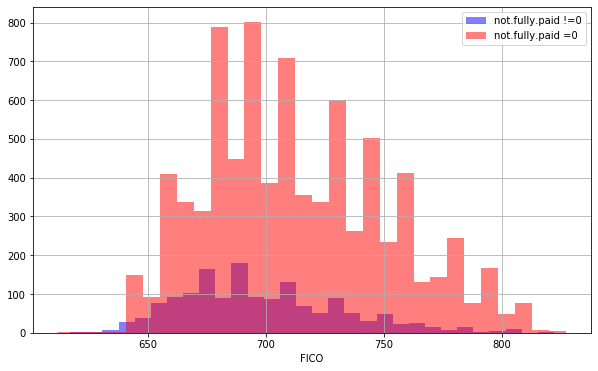

In [116]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] != 0]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid !=0')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid =0')
plt.legend()
plt.xlabel('FICO')

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

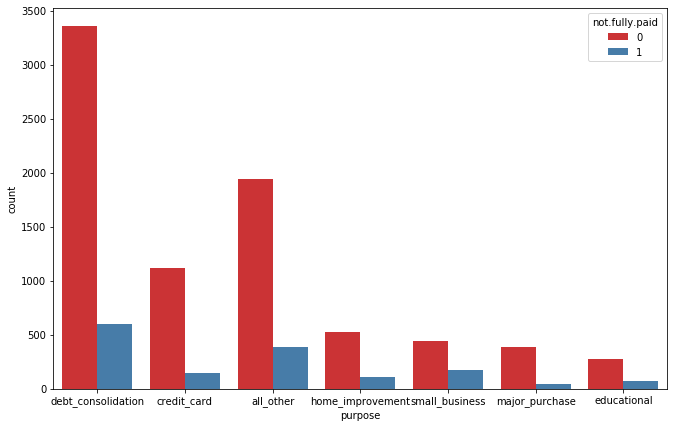

In [117]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

# Setting up the Data

Let's get ready to set up our data for the decision tree and the Random Forest Classification Model!

**Check loans.info() again.**

In [118]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical. That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's deal with these columns in a way that can be expanded to multiple categorical features if necessary.

 
**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**



In [119]:
cat_feats = ['purpose']
cat_feats

['purpose']

**Use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set the output dataframe as final_data.**

In [120]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

**Get the info and check the first couple of rows in this dataframe.**

In [121]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [122]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = final_data.drop('not.fully.paid',axis=1) 
y = final_data['not.fully.paid']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Verify some rows in your split sets.**

In [126]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7868,0,0.1154,494.93,10.819778,0.00,687,299.958333,557,22.3,1,0,0,0,1,0,0,0,0
3519,1,0.1284,235.33,9.574983,3.00,707,1199.958333,3449,19.7,2,0,0,0,0,0,0,0,0
604,1,0.1166,330.53,10.308953,15.44,687,2159.000000,10997,75.3,0,0,0,0,1,0,0,0,0
3293,1,0.1158,759.31,11.195471,6.38,752,5309.958333,25051,30.1,0,0,0,0,1,0,0,0,0
8986,0,0.1221,239.87,10.275051,15.77,722,5370.000000,15557,24.5,4,0,0,1,0,0,0,0,0


In [127]:
X_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
6143,1,0.1392,290.17,10.596635,16.05,697,1980.041667,13013,66.1,1,0,0,0,1,0,0,0,0
3231,1,0.1284,487.46,10.545341,18.66,697,4921.958333,13168,76.6,1,0,0,0,1,0,0,0,0
8573,0,0.1355,190.18,10.571317,6.77,657,725.000000,4885,57.5,0,0,0,0,0,1,0,0,0
4895,1,0.1183,614.64,10.668955,5.86,732,4649.958333,10133,25.6,2,0,0,0,1,0,0,0,0
336,1,0.1236,292.97,10.727663,15.53,677,1848.000000,8494,44.2,1,0,0,0,0,0,0,0,0


In [128]:
y_train.head()

7868    0
3519    1
604     0
3293    0
8986    0
Name: not.fully.paid, dtype: int64

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [129]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [130]:
dtree = DecisionTreeClassifier()

In [131]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [132]:
predictions = dtree.predict(X_test)

In [133]:
from sklearn.metrics import classification_report,confusion_matrix

In [134]:
print(confusion_matrix(y_test,predictions))

[[2008  399]
 [ 348  119]]


In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2407
           1       0.23      0.25      0.24       467

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.75      2874



## Training the Random Forest model


**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [157]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [158]:
rfc_pred = rfc.predict(X_test)

**Now create a classification report from the results.**

In [159]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2407
           1       0.43      0.02      0.04       467

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



**From the classification report, do you get anything strange or some sort of warning?**

In [160]:
#write your answer here
The strange thing is that the model now is rarely predicting not.fully.paid=1
and it predicted 448 actual 1 as 0 and only 8 actual 1 as 1. Thus the recall
score is 0.02 which is very low.
This means that it has a very high rate of false negative.
So from the classification report, if we cannot tolerate having false negative,
which is the case for example in a model predicting if the patient has cancer,
then in this case this model would not be acceptable.

SyntaxError: invalid syntax (<ipython-input-160-acb731700a5b>, line 2)

**Show the Confusion Matrix for the predictions.**

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

# Great Job!